In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import  Lambda
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.losses import Huber

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.utils import to_categorical


from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/csh101.ann.features.csv')


labels = data['activity'].replace(['Step_Out', 'Other_Activity', 'Toilet', 'Phone',
       'Personal_Hygiene', 'Leave_Home', 'Enter_Home', 'Relax',
       'Sleep_Out_Of_Bed', 'Drink', 'Watch_TV', 'Dress', 'Evening_Meds',
       'Wake_Up', 'Read', 'Morning_Meds', 'Cook_Breakfast',
       'Eat_Breakfast', 'Bathe', 'Cook_Lunch', 'Eat_Lunch',
       'Wash_Lunch_Dishes', 'Go_To_Sleep', 'Sleep',
       'Bed_Toilet_Transition', 'Wash_Breakfast_Dishes', 'Work_At_Table',
       'Groom', 'Cook', 'Eat', 'Cook_Dinner', 'Eat_Dinner',
       'Wash_Dinner_Dishes', 'Wash_Dishes', 'Entertain_Guests'],[x for x in range(35)])

data=data.iloc[:, 0:-1].values

trai test split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(data)

X = []
y = []
for i in range(60, 241071):
    X.append(data[i-60:i, :])
    y.append(labels[i])
X, y = np.array(X), to_categorical(np.array(y))
np.shape(X)
X = np.reshape(X, (X.shape[0], X.shape[1], 36))

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.25, random_state=1)

fit

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, MaxPooling1D, Bidirectional
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard

adm=Adam(learning_rate=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
model = Sequential()

model.add(Conv1D(64, kernel_size=5, activation='relu', padding='same',
                 input_shape= (X_train.shape[1], 36)))

model.add(Conv1D(64, kernel_size=5, activation='relu', padding='same'))
#model.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))

model.add(MaxPooling1D(pool_size=7))


model.add(Bidirectional(LSTM(256, dropout=0.01, recurrent_dropout=0.03 , return_sequences= True)))
model.add(Bidirectional(LSTM(256, dropout=0.01, recurrent_dropout=0.03)))

#model.add(Dense(100, activation='sigmoid'))
#model.add(Dropout(0.2))
#model.add(Dense(100, activation='sigmoid'))
#model.add(Dropout(0.25))
#model.add(Dense(100, activation='sigmoid'))
#model.add(Dropout(0.25))

model.add(Dense(35, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adm, metrics=['accuracy'])



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 60, 64)            11584     
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 64)            20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 64)            0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 8, 512)           657408    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              1574912   
 nal)                                                            
                                                        

In [ ]:
network_history = model.fit(X_train, y_train, batch_size=128,  epochs=12, validation_data=(X_val, y_val))


Epoch 1/12
1060/1060 [==============================] - 295s 259ms/step - loss: 1.0726 - accuracy: 0.6499 - val_loss: 0.8454 - val_accuracy: 0.7094
Epoch 2/12
1060/1060 [==============================] - 271s 256ms/step - loss: 0.7187 - accuracy: 0.7478 - val_loss: 0.6488 - val_accuracy: 0.7682
Epoch 3/12
1060/1060 [==============================] - 272s 257ms/step - loss: 0.5527 - accuracy: 0.8042 - val_loss: 0.4801 - val_accuracy: 0.8333
Epoch 4/12
1060/1060 [==============================] - 270s 254ms/step - loss: 0.4129 - accuracy: 0.8557 - val_loss: 0.3808 - val_accuracy: 0.8698
Epoch 5/12
1060/1060 [==============================] - 271s 255ms/step - loss: 0.3253 - accuracy: 0.8861 - val_loss: 0.3253 - val_accuracy: 0.8887
Epoch 6/12
1060/1060 [==============================] - 269s 254ms/step - loss: 0.2685 - accuracy: 0.9068 - val_loss: 0.2675 - val_accuracy: 0.9085
Epoch 7/12
1060/1060 [==============================] - 269s 254ms/step - loss: 0.2289 - accuracy: 0.9204 - val_

evaluate

<Figure size 432x288 with 0 Axes>

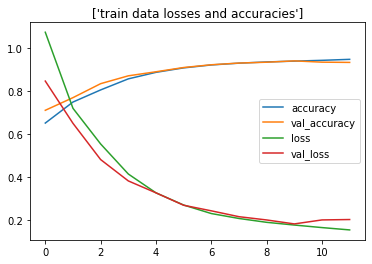

<Figure size 432x288 with 0 Axes>

In [ ]:

history = network_history.history


losses = history['loss']
val_losses = history['val_loss']
accuracies = history['accuracy']
val_accuracies = history['val_accuracy']

plt.xlabel = ('epochs')
plt.ylabel = ('accuracy')
plt.plot(accuracies)
plt.plot(val_accuracies)
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.title(['train data losses and accuracies'])
plt.figure()

In [ ]:
model.save('/content/drive/MyDrive/my_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/my_model.h5')

prediction

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)


print('test_loss =',test_loss)
print('test_accuracy =',test_accuracy)



1883/1883 [==============================] - 50s 22ms/step - loss: 0.1983 - accuracy: 0.9351
test_loss = 0.19832094013690948
test_accuracy = 0.9351235628128052
